# Top 50 songs in each country

In this analysis, we will be looking at the different favourite songs in each country, see if theres a difference in the genre of songs they prefer and find a correlations with the bpm with the energy level and dancibiity level.

## Imports

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
sns.set_theme()

## Data Exploration

In [4]:
songs_df=pd.read_csv('../Downloads/top50contry.csv')
songs_df.head()

,Unnamed: 0,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance Monkey,Tones and I,australian pop,2019,1969-12-31,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,2,ROXANNE,Arizona Zervas,pop rap,2019,1969-12-31,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,3,Memories,Maroon 5,pop,2019,1969-12-31,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,4,Circles,Post Malone,dfw rap,2019,1969-12-31,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,1969-12-31,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


In [6]:
songs_df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,1000.000000,1000.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,500.500000,2010.025000,123.644645,61.650651,64.282282,-6.807808,20.003003,59.732733,206.074000,34.894895,8.703704,81.443000
std,288.819436,16.904264,31.005120,19.064732,16.032857,3.241313,17.956443,22.000356,51.224198,28.778784,8.432230,13.090229
min,1.000000,1942.000000,47.000000,10.000000,16.000000,-23.000000,2.000000,5.000000,85.000000,0.000000,2.000000,0.000000
25%,250.750000,2011.000000,98.000000,49.000000,53.000000,-8.000000,9.000000,42.000000,172.000000,10.000000,4.000000,75.000000
50%,500.500000,2019.000000,120.000000,65.000000,67.000000,-6.000000,12.000000,61.000000,201.000000,27.000000,5.000000,85.000000
75%,750.250000,2019.000000,147.000000,76.000000,76.000000,-5.000000,25.000000,77.000000,231.000000,59.000000,9.000000,90.000000
max,1000.000000,2019.000000,205.000000,98.000000,95.000000,0.000000,98.000000,98.000000,464.000000,99.000000,56.000000,100.000000


In [8]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   title       1000 non-null   object 
 2   artist      1000 non-null   object 
 3   top genre   985 non-null    object 
 4   year        1000 non-null   int64  
 5   added       1000 non-null   object 
 6   bpm         999 non-null    float64
 7   nrgy        999 non-null    float64
 8   dnce        999 non-null    float64
 9   dB          999 non-null    float64
 10  live        999 non-null    float64
 11  val         999 non-null    float64
 12  dur         1000 non-null   int64  
 13  acous       999 non-null    float64
 14  spch        999 non-null    float64
 15  pop         1000 non-null   int64  
 16  country     1000 non-null   object 
dtypes: float64(8), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
#finding the null values
songs_df.isnull().sum()

Unnamed: 0     0
title          0
artist         0
top genre     15
year           0
added          0
bpm            1
nrgy           1
dnce           1
dB             1
live           1
val            1
dur            0
acous          1
spch           1
pop            0
country        0
dtype: int64

## Data Preparation

In [14]:
#Fill only the top genre
songs_df['top genre'].ffill()

0         australian pop
1                pop rap
2                    pop
3                dfw rap
4              dance pop
             ...        
995                  pop
996      malaysian indie
997       indonesian pop
998    malaysian hip hop
999       indonesian pop
Name: top genre, Length: 1000, dtype: object

In [107]:
#dropping row with null values
songs_df=songs_df.dropna()

In [22]:
songs_df.isnull().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
added         0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
country       0
dtype: int64

In [113]:
#dropping the rows with world in it because it is not a country
songs_df=songs_df.drop(songs_df[songs_df['country']=='world'].index)
songs_df['country'].unique()

array(['africa', 'argentina', 'australia', 'belgium', 'bolivia', 'brazil',
       'canada', 'germany', 'colombia', 'chile', 'spain', 'usa', 'france',
       'india', 'indonesia', 'israel', 'italy', 'japan', 'malasya'],
      dtype=object)

## Data Analysis and Data visualizations


#### Who are the 10 most popular artist?

In [193]:
#finding the 10 most popular artist 
top_ten_artists=songs_df['artist'].value_counts()
top_ten_artists=top_ten_artists[:11].reset_index()
top_ten_artists

,artist,count
0,Michael Bubl,29
1,Tones and I,17
2,Mariah Carey,17
3,Ariana Grande,15
4,Arizona Zervas,13
5,Dalex,12
6,Wham!,12
7,J Balvin,11
8,Lunay,11
9,Sech,11


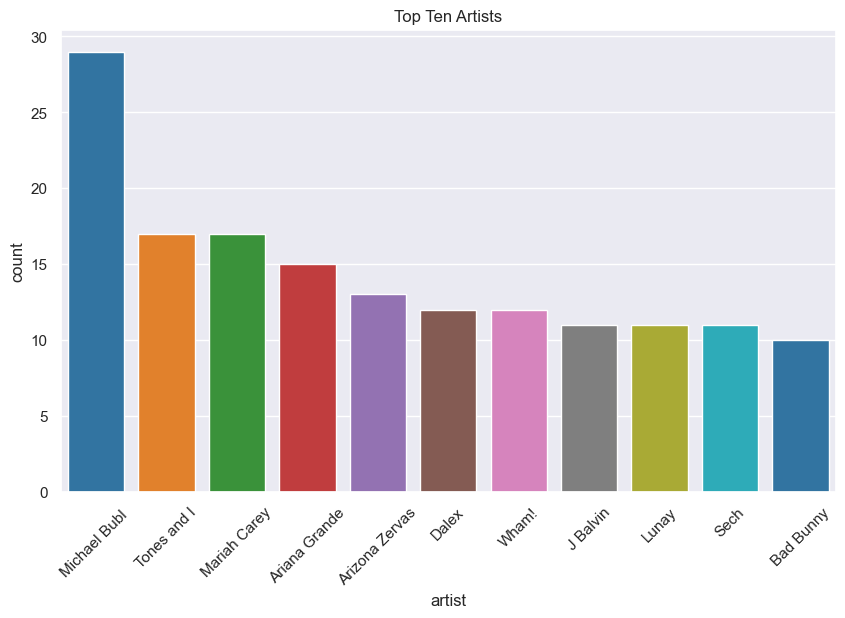

In [506]:
plt.figure(figsize=[10,6])
sns.barplot(top_ten_artists,x='artist',y='count',hue='artist',palette='tab10')
plt.xticks(rotation=45)
plt.title('Top Ten Artists')
plt.show()

#### What are the top 10 songs that appear the most on the list?

In [ ]:
top_ten_songs=songs_df['title'].value_counts()
top_ten_songs=top_ten_songs[:11].reset_index()
top_ten_songs

,title,count
0,Dance Monkey,16
1,ROXANNE,13
2,All I Want for Christmas Is You,13
3,Last Christmas,12
4,Santa Tell Me,10
5,Jingle Bell Rock,10
6,It's Beginning to Look a Lot like Christmas,10
7,Se orita,10
8,Falling,9
9,Memories,9


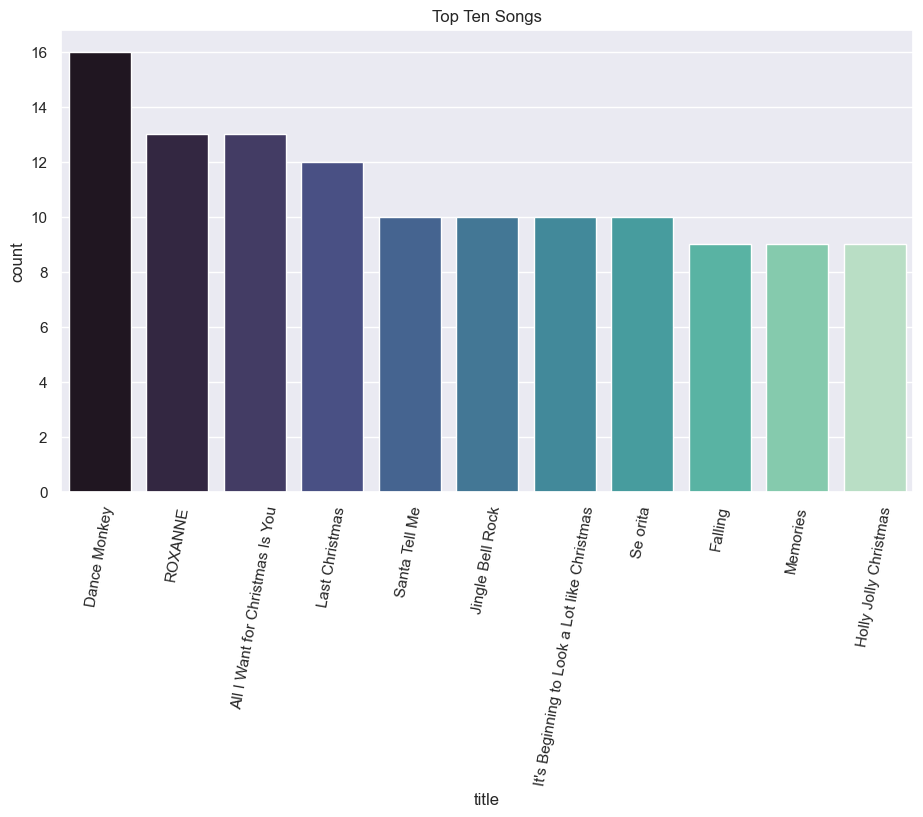

In [520]:
plt.figure(figsize=[11,6])
sns.barplot(top_ten_songs,x='title',y='count', hue='title',palette='mako')
plt.xticks(rotation=80)
plt.title('Top Ten Songs')
plt.show()

#### Which genres are the most listened to?

In [293]:
genres=songs_df['top genre'].value_counts().reset_index().copy()
genres

,top genre,count
0,adult standards,128
1,latin,114
2,dance pop,71
3,pop,38
4,album rock,29
...,...,...
107,disco,1
108,deep euro house,1
109,chanson,1
110,modern bollywood,1


I will be first finding the top 10 genres, and then all the other genres, I will be putting it in 1 group. The reasoning is that multiple genres have only 1 count in them. So in other to be able to understand the data more, it is best to not have the visualization to crowded.

In [263]:
#finding the top ten
top_ten_genres=genres[:11]
top_ten_genres

,top genre,count
0,adult standards,128
1,latin,114
2,dance pop,71
3,pop,38
4,album rock,29
5,desi pop,29
6,french hip hop,22
7,j-pop,21
8,canadian pop,19
9,australian pop,17


In [688]:
#adding all the other genres into 1 group called 'other'
others=genres['count'][11:].sum()
others

444

In [271]:
top_ten_genres.loc[11]={'top genre':'Other','count':others}
top_ten_genres

,top genre,count
0,adult standards,128
1,latin,114
2,dance pop,71
3,pop,38
4,album rock,29
5,desi pop,29
6,french hip hop,22
7,j-pop,21
8,canadian pop,19
9,australian pop,17


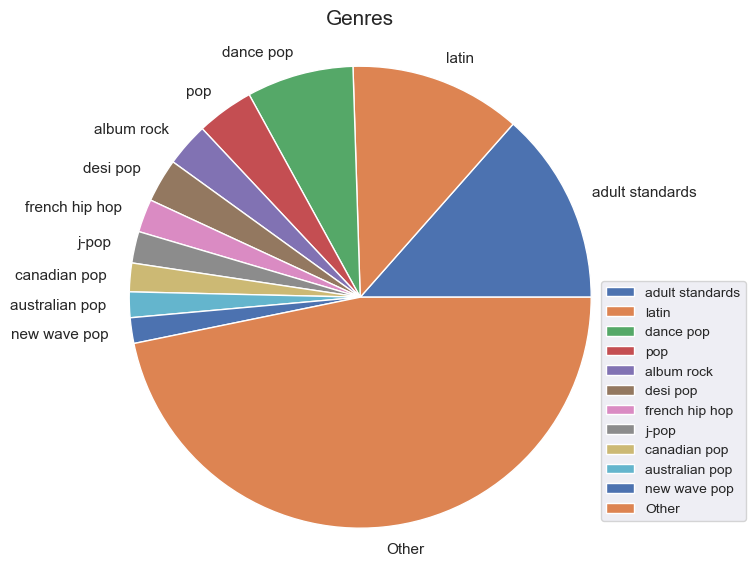

In [569]:
plt.figure(figsize=[10,6])
plt.pie(top_ten_genres['count'], labels=top_ten_genres['top genre'],radius=1.25)
plt.title('Genres',loc='center',fontsize=15,pad=30)
plt.legend(loc='lower right',bbox_to_anchor=(1, 0,0.35, 1), fontsize=10)
plt.show()

Analysis:
In this chart, we notice that adult standards is the genre we listened to the most, followed by latin. Although 'Other' has the most values, we is the sum of all the other genres we did not mention.

#### What is the average of bpm per country?

In [693]:
beats=songs_df.groupby('country')['bpm'].mean().reset_index().sort_values(by='bpm',ascending=False)
beats

,country,bpm
5,brazil,137.600000
10,germany,130.520000
17,spain,128.420000
4,bolivia,128.420000
15,japan,125.760000
14,italy,125.760000
3,belgium,125.540000
6,canada,125.520000
18,usa,125.340000
7,chile,125.140000


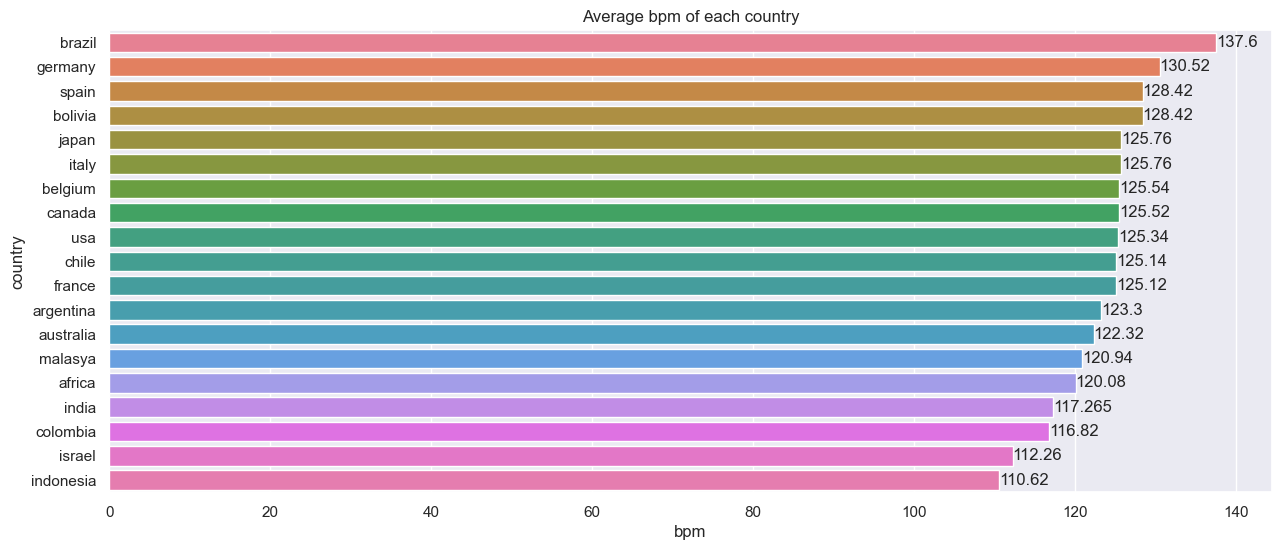

In [727]:
plt.figure(figsize=[15,6])
ax=sns.barplot(beats, y='country', x='bpm', hue='country')
plt.title('Average bpm of each country')
plt.xticks(range(0,150,20))
for num in ax.containers:
    ax.bar_label(num,)
plt.show()

Analysis:
In this plot, we notice how the bpm affects their favorite songs. We can see that brazil prefers more upbeat songs, while Indonesia prefers less upbeat song.

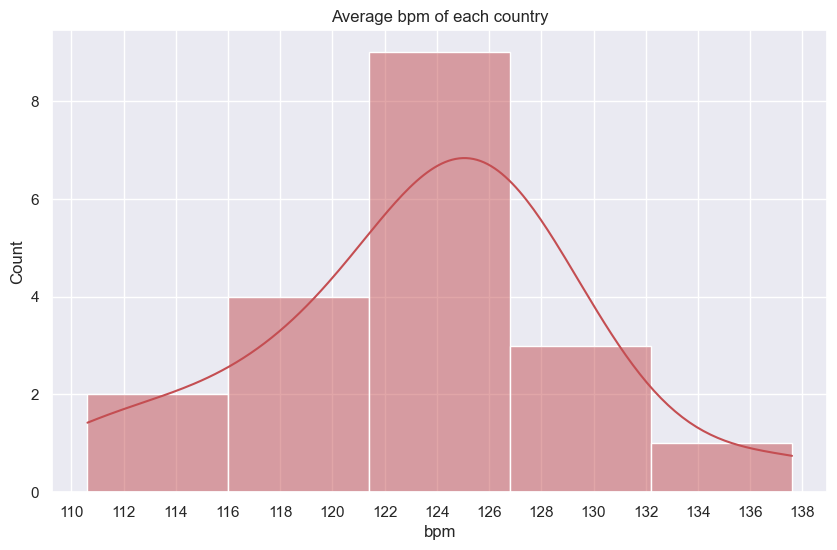

In [730]:
#making a kde plot to visualize the average bpm
plt.figure(figsize=[10,6])
sns.histplot(beats, x='bpm',kde=True, color='r',bins=5)
plt.xticks(range(110,140,2))
plt.title('Average bpm of each country')
plt.show()

Analysis: For this plot, we notice that most countries have their average bpm in the third bin. Meaning that many countries have similar interest in songs with the same bpm.

#### Do the bpm of the songs have anything to do with the energy?


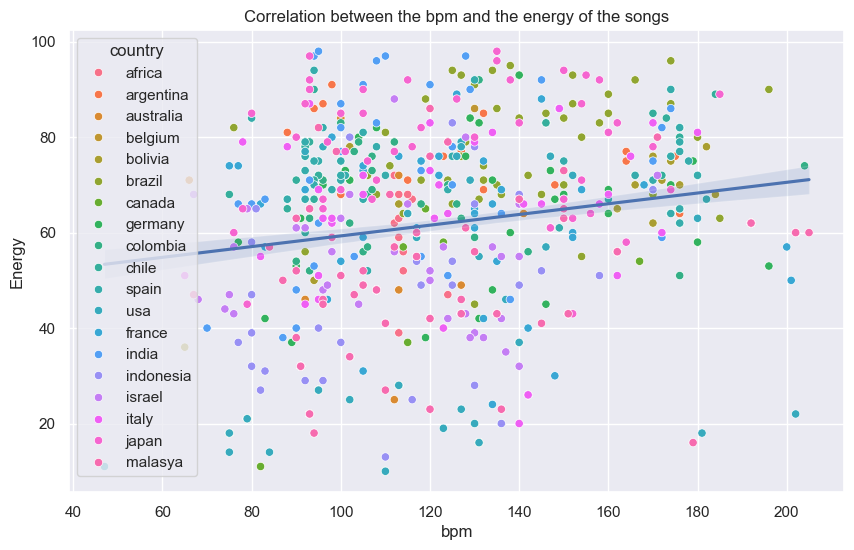

In [733]:
#bpm to energy
plt.figure(figsize=[10,6])
sns.scatterplot(songs_df,x='bpm', y='nrgy', hue='country')
sns.regplot(songs_df, x='bpm', y='nrgy', scatter=False)
plt.title('Correlation between the bpm and the energy of the songs')
plt.ylabel('Energy')
plt.show()

Analysis: we notice how the points are very scattered and distant from each other. The kde line shows a positive correlation, however slant is not very high, and the dots are very far from the line, meaning there is not much correlations

#### Do the bpm of the songs have anything to do with the dancibility?

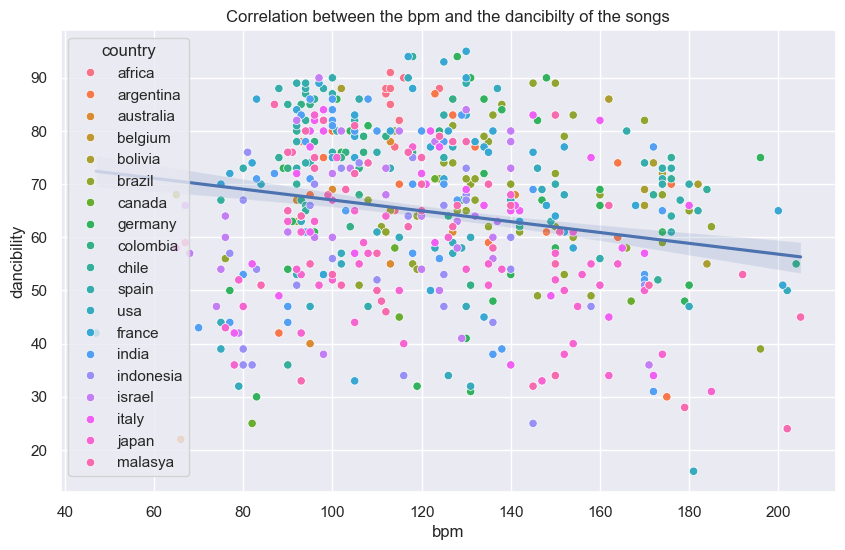

In [681]:
#bpm to dancibility
color=sns.color_palette('pastel')
plt.figure(figsize=[10,6])
sns.scatterplot(songs_df, x='bpm', y='dnce', hue='country')
sns.regplot(songs_df, x='bpm', y='dnce', scatter=False)
plt.title('Correlation between the bpm and the dancibilty of the songs')
plt.ylabel('dancibility')
plt.show()

Analysis: Here, we notice the slant is more slanted and the dots are less scattered compared to the camparison with the energy diagramme. However, there is a negative correlation happening here, and not much of a correlation either, since the dots are far from the line.